In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ticktack
from ticktack import fitting
import os
from matplotlib.lines import Line2D
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
mpl.style.use('seaborn-colorblind')

In [2]:
sf = fitting.SingleFitter("Brehm21", "Brehm21")
sf.load_data("data/ETH.csv")


INFO[2022-02-22 18:51:49,356]: Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
INFO[2022-02-22 18:51:49,358]: Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
INFO[2022-02-22 18:51:49,361]: Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
WARNING[2022-02-22 18:51:49,362]: No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [4]:
result = sf.MC_mean_std(iters=100)

100%|█████████████████████████████████████████| 100/100 [00:37<00:00,  2.64it/s]


(990.0, 1050.0)

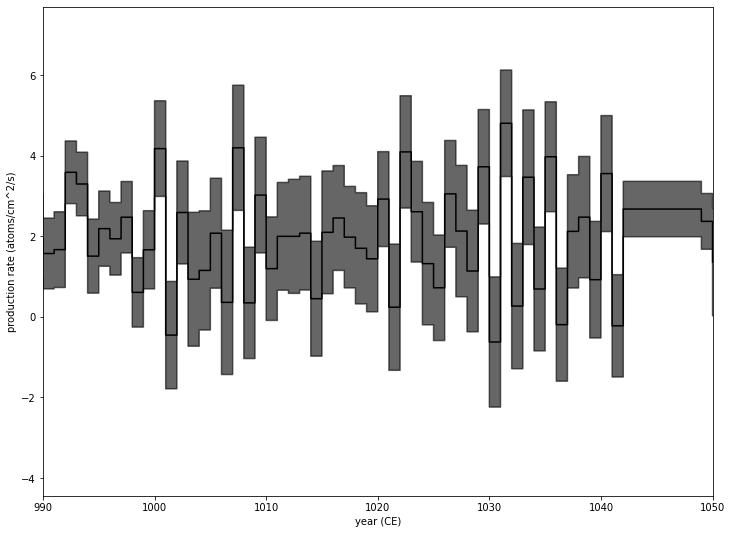

In [11]:
fig, ax = plt.subplots(figsize=(12.0,9.0))
mean = np.mean(result, axis=0)
std = np.std(result, axis=0)
ax.errorbar(sf.time_data,mean, color='black', drawstyle="steps")
ax.fill_between(sf.time_data, mean-std, mean+std,step='pre', alpha=0.6,
                facecolor=(0,0,0,.1),edgecolor=(0,0,0,0.8), lw=1.5)
plt.xlabel("year (CE)")
plt.ylabel("production rate (atoms/cm^2/s)")

plt.xlim(990,1050)
